# Normalized FIT

The smallest value normalizes all data in the given device. For Kepler, FADD’s DUE is the smallest FIT, and for Volta, HFMA’s DUE is the smallest one.

## Microbenchmarks FIT

In [1]:
import pandas as pd

#load the fit
micro_fit_df = pd.read_csv("data/fit_microbenchmarks_devices.csv")

In [2]:
micro_fit_df
# set the index to plot
micro_fit_df = micro_fit_df.set_index(["device", "micro"])

In [3]:
micro_fit_df

SDC         DUE    Err SDC    Err DUE
device micro                                               
Kepler FADD      3.714286    1.000000   0.824298   0.093333
       FMUL      3.447787    1.571785   0.819487   0.099377
       FFMA      4.147008    1.058811   0.838353   0.086470
       IADD     12.650495   10.364261   2.721601   2.463428
       IMUL     17.666145    9.814525   3.480008   2.593845
       IMAD     19.411211    5.076778   3.336853   0.292661
       LDST      3.249828   23.094519   0.929111   2.476805
       RF       30.975633    0.676183   1.957441   0.289208
       SHARED    4.161099    6.386802   1.243741   1.540876
Volta  HADD      3.471296    1.531454   0.200110   0.200110
       HMUL      3.774284    1.698428   1.169663   0.184940
       HFMA      5.400000    1.000000   1.440300   0.196000
       FADD      4.371616    1.417822   0.231578   0.231578
       FMUL      4.781717    1.716514   0.240312   0.240312
       FFMA      9.177498    1.643731   2.197571   0.268476
       DADD      3.074446    1.601274   0.869766   0.125540
       DMUL      7.103024    1.083512   1.812481   0.235965
       DFMA      9.246477    2.133802   2.052036   0.232347
       IADD      7.268681    4.330278   2.078082   0.303119
       IMUL      6.326707    4.380028   0.476936   0.476936
       IMAD      7.418876    3.297278   0.807833   0.807833
       HMMA     49.556391  100.489348   2.698070  23.052322
       FMMA    111.420344   65.449713  18.262177  13.996652
       RF       10.698187    0.221368   0.396054   0.056971
       SHARED    1.253772    1.278355   0.243318   0.245692

In [4]:
#import the plot libraries
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='device,micro'>

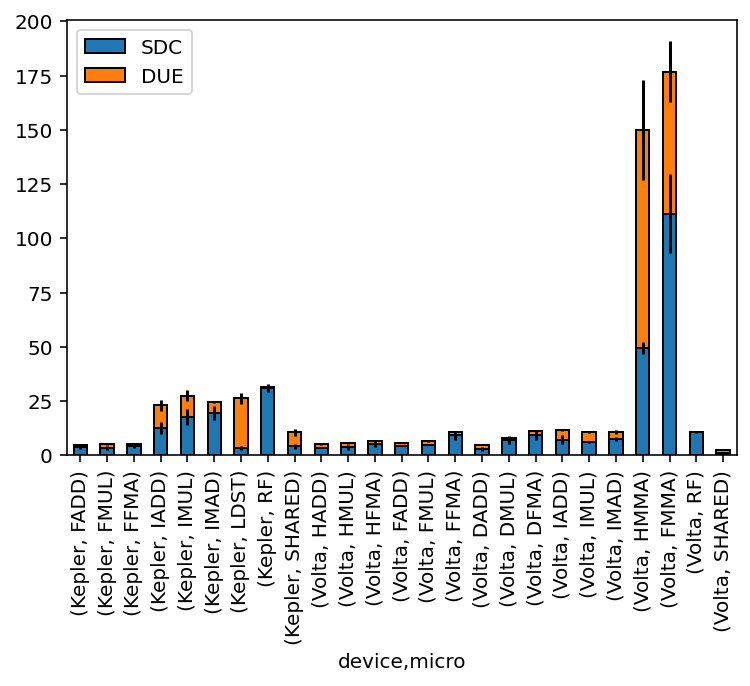

In [5]:
# Plot microbenchmarks FIT with error bars
errors = micro_fit_df[["Err SDC", "Err DUE"]].rename(columns={"Err SDC": "SDC", "Err DUE": "DUE"})

fig, ax=plt.subplots(dpi=144)

micro_fit_df.plot.bar(y=["SDC", "DUE"], stacked=True, yerr=errors, edgecolor="black", ax=ax)

## Benchmarks FIT 

In [6]:
# load the fit
benchmarks_fit_df = pd.read_csv("data/fit_benchmarks_devices.csv", index_col=["device", "ECC status", "benchmarks"])

In [7]:
benchmarks_fit_df

SDC         DUE    Err SDC    Err DUE
device ECC status benchmarks                                              
Kepler ECC OFF    FHOTSPOT     31.920196   27.166124   9.125837   8.418869
                  FLAVA        15.612427   21.647482   2.805130   3.303098
                  FMXM         42.225117    1.860768   4.818545   0.280547
                  NW           27.496046   44.251449   6.736531   8.546041
                  MERGESORT     8.731672   38.648386   2.191233   4.610049
                  QUICKSORT    43.028987   10.040097   2.811227   2.811227
                  FGEMM       111.295233   13.748235  16.730471   1.283169
                  FYOLOV3       3.219585   16.723955   0.743686   1.694959
       ECC ON     FHOTSPOT      4.547940   25.967268   0.287547   3.825566
                  FLAVA         2.098710   21.534592   0.178847   2.747494
                  FMXM          1.994399    2.597357   0.596120   0.680289
                  FLUD         16.782807   12.731785   2.731723   2.379299
                  FGAUSSIAN     3.528234   13.142673   1.093411   2.110312
                  CCL           1.673517   13.202188   0.121485   1.773014
                  BFS          24.920021   14.717865   4.001394   3.075102
                  NW            8.992299  131.163532   0.607755  12.499683
                  MERGESORT     1.191250   28.907678   0.155657   2.969741
                  QUICKSORT     2.637971   14.157113   0.172347   2.186844
                  FGEMM        29.646243   68.414406   2.234871  17.311233
                  FYOLOV3       2.719625    7.425007   0.671575   1.109657
Volta  ECC OFF    HHOTSPOT      1.667896    2.779827   1.089692   1.089692
                  FHOTSPOT     14.079961    5.631985   5.519345   5.519345
                  DHOTSPOT     49.574807    5.508312   5.398146   5.398146
                  HLAVA         6.374901   17.758652   0.892486   0.892486
                  FLAVA        32.301098   15.629564   8.040397   1.021131
                  DLAVA        45.279388   19.686690  10.683956   1.286197
                  HMXM         49.340956    6.728312  11.903966   1.465277
                  FMXM         83.602206    3.732241  15.483345   1.463039
                  DMXM         93.273103   11.833155  15.792835   1.364293
       ECC ON     HGEMM        13.256050   35.869312   1.528345  10.365737
                  FGEMM        20.285336   51.437816   1.419974  11.964910
                  DGEMM        26.524302   64.837182   2.888202  19.158163
                  HGEMM-MMA     8.112932   48.136730   1.060090  10.000867
                  FGEMM-MMA    30.162531   69.025792   8.198269  12.402065
                  HYOLOV3      12.635721   39.630215   1.125728   9.350998
                  FYOLOV3      22.173750   75.144374   2.414475  18.857652

<AxesSubplot:xlabel='device,ECC status,benchmarks'>

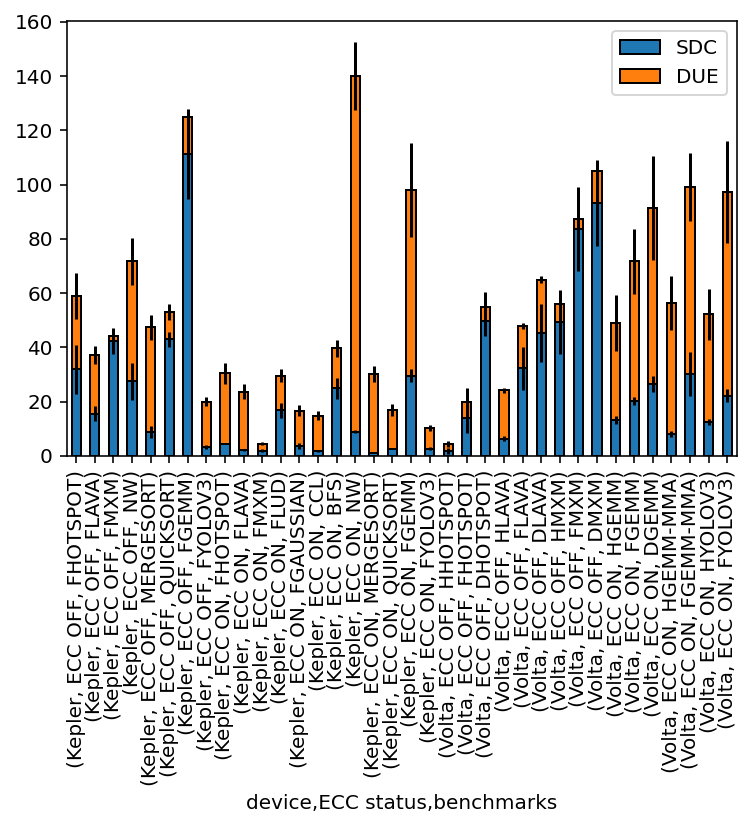

In [8]:
# Plot benchmarks FIT with error bars
errors = benchmarks_fit_df[["Err SDC", "Err DUE"]].rename(columns={"Err SDC": "SDC", "Err DUE": "DUE"})

fig, ax=plt.subplots(dpi=144)

benchmarks_fit_df.plot.bar(y=["SDC", "DUE"], stacked=True, yerr=errors, edgecolor="black", ax=ax)